# Basic Bar Plots with Matplot Lib

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#Read data
file = "activites_summary2018to2024.csv"
df = pd.read_csv(file,index_col=0)
df.head()


,id,name,start_date_local,type,distance,moving_time,elapsed_time,total_elevation_gain,elev_high,elev_low,...,max_speed,start_latlng,start_latitude,start_longitude,distance_km,day_of_week,month_of_year,year,elapsed_time_hr,moving_time_hr
0,11029767787,Afternoon Run,2024-03-24 16:51:17,Run,5830.9,0 days 00:00:00.000002329,0 days 00:00:00.000002338,66.0,1108.8,1041.2,...,4.242,"[45.93127663247287, 6.885922718793154]",45.931277,6.885923,5.8309,Sunday,3,2024,6.494444e-10,6.469444e-10
1,11023346128,Evening Hike,2024-03-23 17:23:17,Hike,7526.3,0 days 00:00:00.000006753,0 days 00:00:00.000008219,412.8,1467.9,1055.3,...,5.020,"[45.931394, 6.885971]",45.931394,6.885971,7.5263,Saturday,3,2024,2.283056e-09,1.875833e-09
2,11002566710,Afternoon Hike,2024-03-20 17:43:17,Hike,5493.2,0 days 00:00:00.000003577,0 days 00:00:00.000003912,172.0,1204.0,1037.6,...,3.331,"[45.92897697351873, 6.873519765213132]",45.928977,6.873520,5.4932,Wednesday,3,2024,1.086667e-09,9.936111e-10
3,10994052246,Afternoon Run,2024-03-19 17:14:34,Run,6030.8,0 days 00:00:00.000002394,0 days 00:00:00.000002412,121.0,1159.0,1057.8,...,4.654,"[45.93142356723547, 6.8859095592051744]",45.931424,6.885910,6.0308,Tuesday,3,2024,6.700000e-10,6.650000e-10
4,10980393531,Afternoon Hike,2024-03-17 13:27:19,Hike,8840.7,0 days 00:00:00.000009511,0 days 00:00:00.000012143,887.0,1921.6,1037.0,...,2.588,"[45.93166739679873, 6.8862921092659235]",45.931667,6.886292,8.8407,Sunday,3,2024,3.373056e-09,2.641944e-09


In [3]:
years = df['year'].unique()
years_count = df.groupby(['year']).size()

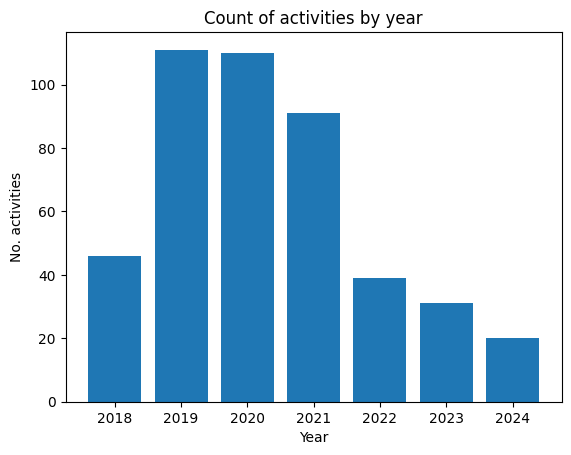

In [4]:
#Basic Bar Chart

fig, ax = plt.subplots()

bar_colors = 'xkcd:sky blue'

ax.bar(years, years_count)

ax.set_xlabel('Year')
ax.set_ylabel('No. activities')
ax.set_title('Count of activities by year')
#ax.legend(title='')

plt.show()

type  AlpineSki  Hike  IceSkate  NordicSki  Ride  RockClimbing  Run
year                                                               
2018          0    20         0          0     0             0    0
2019          0    29         0          0     2             0    0
2020          0    29         0          4     3             0    3
2021          0    62         0          8     0             1   20
2022         14    53         0          3     2             1   37
2023         15    45         0         13     2             1   35
2024         14     8         2         15     0             0    7


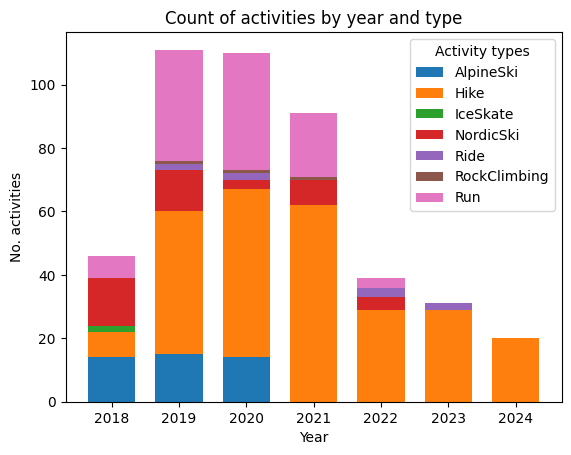

In [5]:
#Stacked Bar Chart

# Group and pivot the stacked data and fill in missing with zeros
activity_counts = (
    df.groupby(['year','type']).size()
      .unstack(fill_value=0)   # types become columns, years become rows, fill in with 0
)

print(activity_counts)


fig, ax = plt.subplots()
# Column width 1 will make them touch
width = 0.7

# Define the number of columns
bottom = np.zeros(years.size)

for a, activity_type in activity_counts.items():
    p = ax.bar(years, activity_type, width, label=a, bottom=bottom)
    bottom += activity_type


#Labels
ax.set_xlabel('Year')
ax.set_ylabel('No. activities')
ax.set_title('Count of activities by year and type')
ax.legend(title='Activity types',loc="upper right")

plt.show()

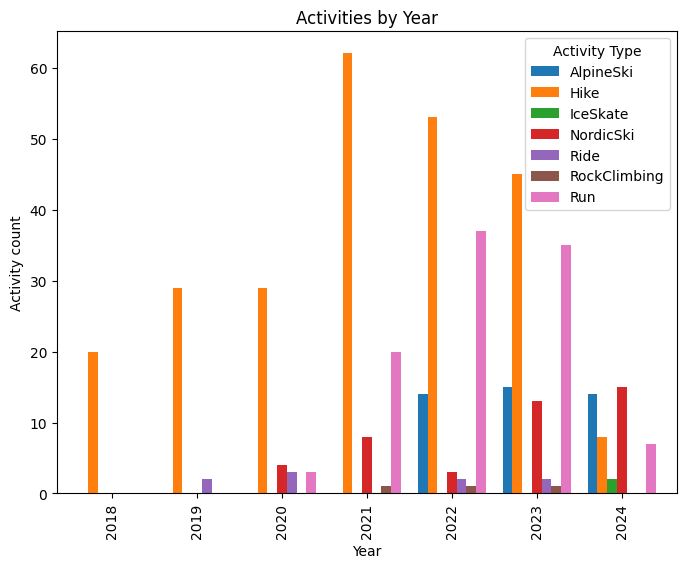

In [6]:

# Count activities by year and type
activity_counts = df.groupby(['year', 'type']).size().unstack()

# Drop columns that are all zeros (never appear in any year)
activity_counts = activity_counts.loc[:, (activity_counts != 0).any(axis=0)]

# Grouped bar chart
ax = activity_counts.plot(
    kind="bar",
    figsize=(8,6),
    width=0.8
)

ax.set_xlabel("Year")
ax.set_ylabel("Activity count")
ax.set_title("Activities by Year")
ax.legend(title="Activity Type")

plt.show()

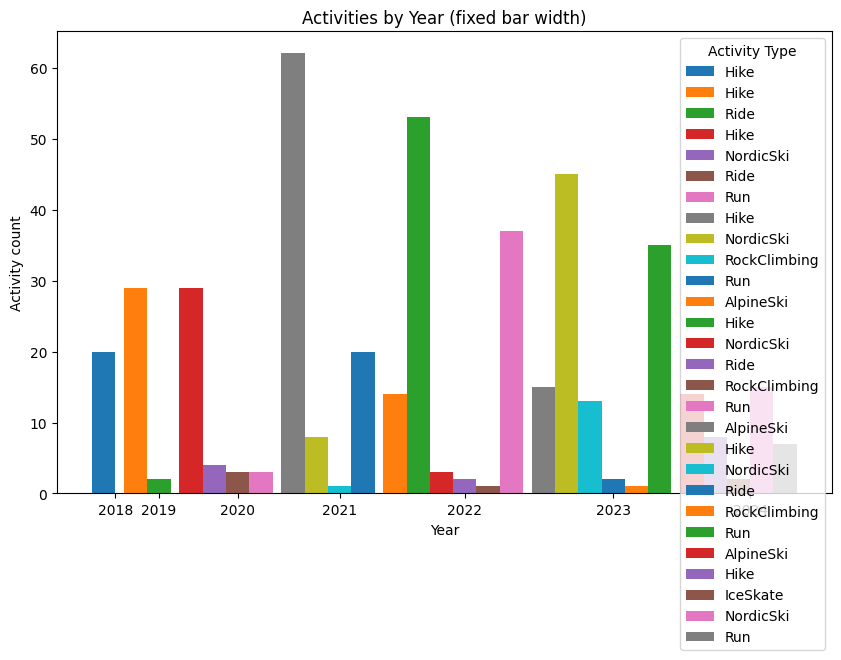

In [7]:

# Count per year/type
activity_counts = df.groupby(['year', 'type']).size()

years = sorted(df['year'].unique())
bar_width = 0.8     # fixed bar width
spacing = 0.3       # gap between year blocks

fig, ax = plt.subplots(figsize=(10,6))

x_positions = []
current_x = 0

for j, year in enumerate(years):
    row = activity_counts.loc[year]
    present_types = row.index
    n_types = len(present_types)

    # compute center of this block
    center_x = current_x + (n_types * bar_width) / 2
    x_positions.append(center_x)

    # draw bars for each activity this year
    for i, activity in enumerate(present_types):
        count = row[activity]
        ax.bar(
            current_x + i*bar_width,
            count,
            width = bar_width,
            label = activity
        )
    # move start position for next year
    current_x += n_types * bar_width + spacing

# center year labels under each group
ax.set_xticks(x_positions)
ax.set_xticklabels(years)

ax.set_xlabel("Year")
ax.set_ylabel("Activity count")
ax.set_title("Activities by Year")
ax.legend(title="Activity Type")

plt.show()

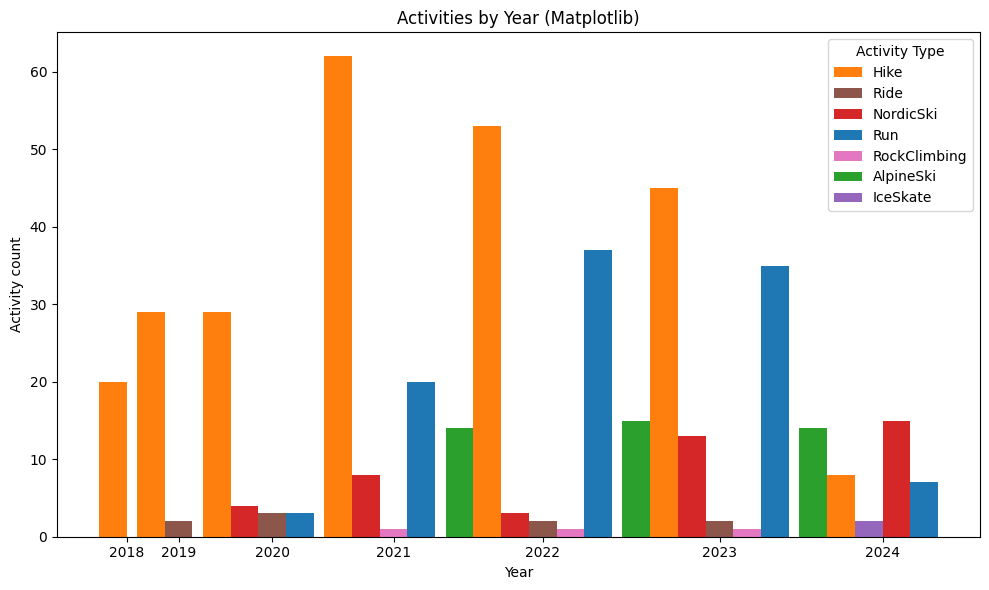

In [25]:
# counts per year/type
activity_counts = df.groupby(['year', 'type']).size()

years = sorted(df['year'].unique())
bar_width = 0.8
spacing = 0.3

# 1) stable order of activities and a color map (consistent colours)
all_activities = list(df['type'].unique())            # or sorted(...)
n_act = len(all_activities)
cmap = plt.get_cmap('tab10') if n_act <= 10 else plt.get_cmap('tab20')
colors = {act: cmap(i % cmap.N) for i, act in enumerate(all_activities)}

fig, ax = plt.subplots(figsize=(10,6))

current_x = 0
x_positions = []
plotted = set()   # track which activity has been added to legend

for year in years:
    row = activity_counts.loc[year]           # counts for this year (Series indexed by type)
    present_types = list(row.index)
    n_types = len(present_types)

    # center x for labels
    center_x = current_x + (n_types * bar_width) / 2
    x_positions.append(center_x)

    for i, activity in enumerate(present_types):
        count = row[activity]
        label = activity if activity not in plotted else None
        ax.bar(
            current_x + i*bar_width,
            count,
            width=bar_width,
            color=colors[activity],
            label=label
        )
        if label is not None:
            plotted.add(activity)

    current_x += n_types * bar_width + spacing

# x ticks centered under each year block
ax.set_xticks(x_positions)
ax.set_xticklabels(years)
ax.set_xlabel("Year")
ax.set_ylabel("Activity count")
ax.set_title("Activities by Year (Matplotlib)")
ax.legend(title="Activity Type", loc='upper right')  # optional outside legend bbox_to_anchor=(1.05, 1),

plt.tight_layout()
plt.show()


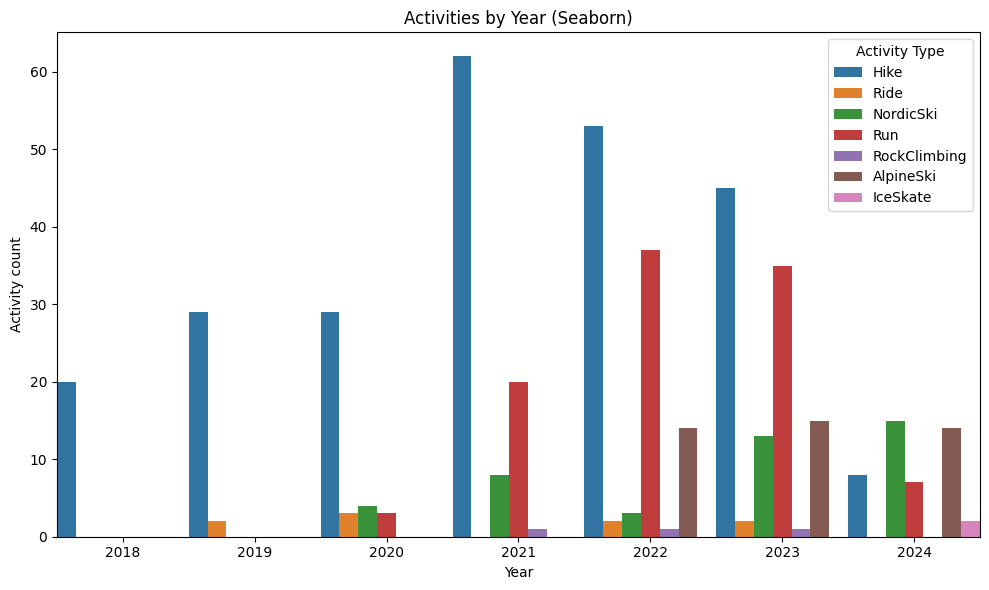

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Count per year/type
activity_counts = df.groupby(['year', 'type']).size().reset_index(name="count")

# Define the order for activities (consistent left→right)
#hue_order = ["Hike", "Run", "AlpineSki", "NordicSki", "IceSkate", "RockClimbing", "Ride"]

# Grouped bar plot with consistent order
plt.figure(figsize=(10,6))
sns.barplot(
    data=activity_counts,
    x="year", y="count", hue="type",
    dodge=True,
    width = 1.
)

plt.xlabel("Year")
plt.ylabel("Activity count")
plt.title("Activities by Year (Seaborn)")
plt.legend(title="Activity Type", loc='upper right')
plt.tight_layout()
plt.show()
